C:\Users\gladb\AppData\Local\Temp\ipykernel_16976\2213125120.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  almond_data['Length (major axis)'].fillna(almond_data['Length (major axis)'].mean(), inplace=True)
D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **k

Fitting 5 folds for each of 54 candidates, totalling 270 fits


D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Program Files\Lib\s

Best Hyperparameters: {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.4, 'model__learning_rate': 0.001, 'model__neurons': 128, 'model__optimizer': 'adam'}
Best Score: 0.9880726327922016


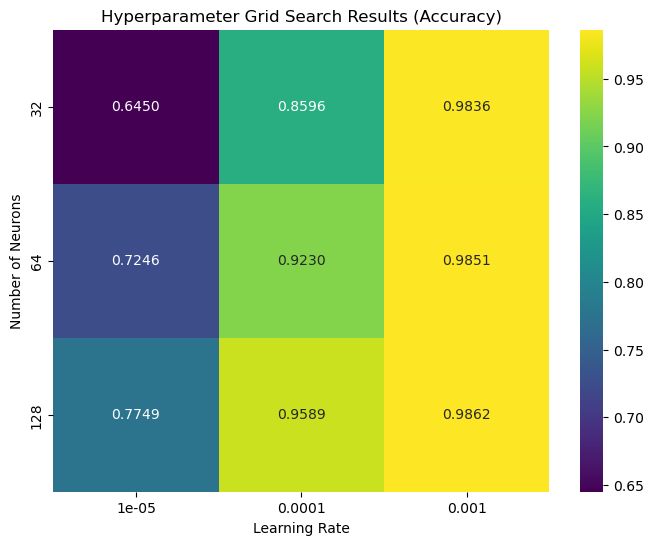

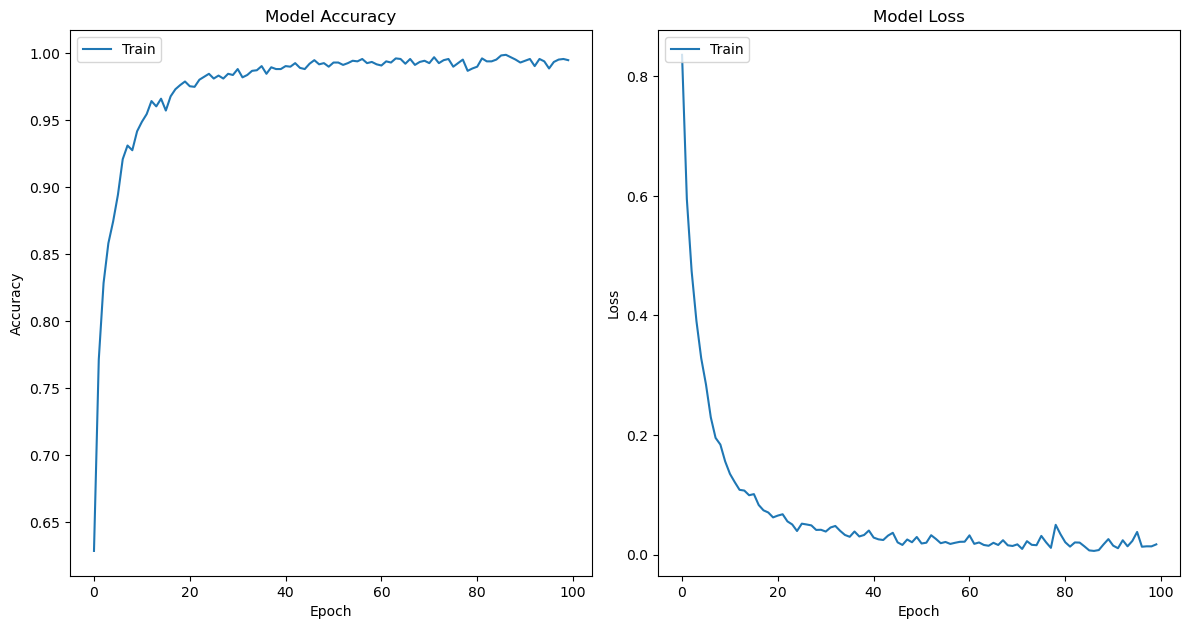

Classification Report:
              precision    recall  f1-score   support

       Mamra       0.98      1.00      0.99       188
      Sanora       1.00      1.00      1.00       189
     Regular       1.00      0.98      0.99       189

    accuracy                           0.99       566
   macro avg       0.99      0.99      0.99       566
weighted avg       0.99      0.99      0.99       566

Test Accuracy: 0.9929328621908127
Test Precision: 0.993080094228504
Test Recall: 0.9929328621908127
Test F1-Score: 0.9929322654721686


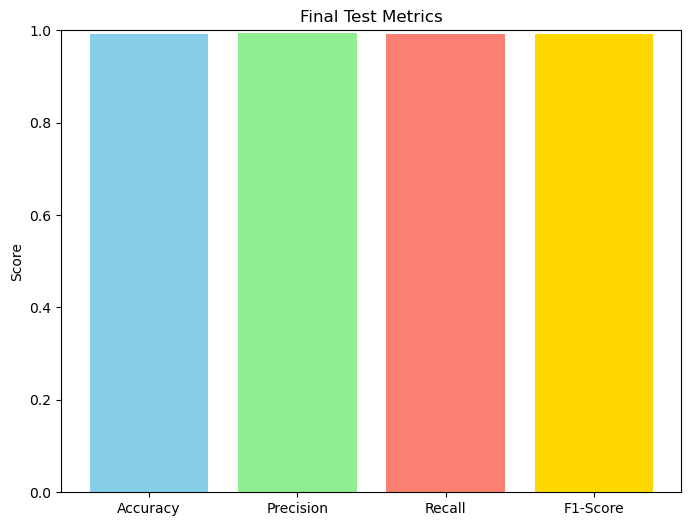

<Figure size 600x600 with 0 Axes>

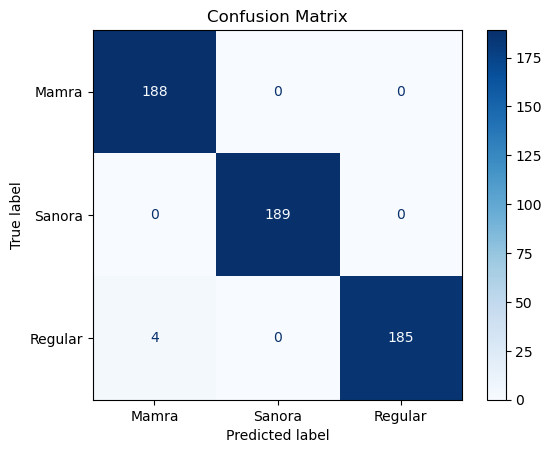

D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Program Files\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\Program Files\Lib\s

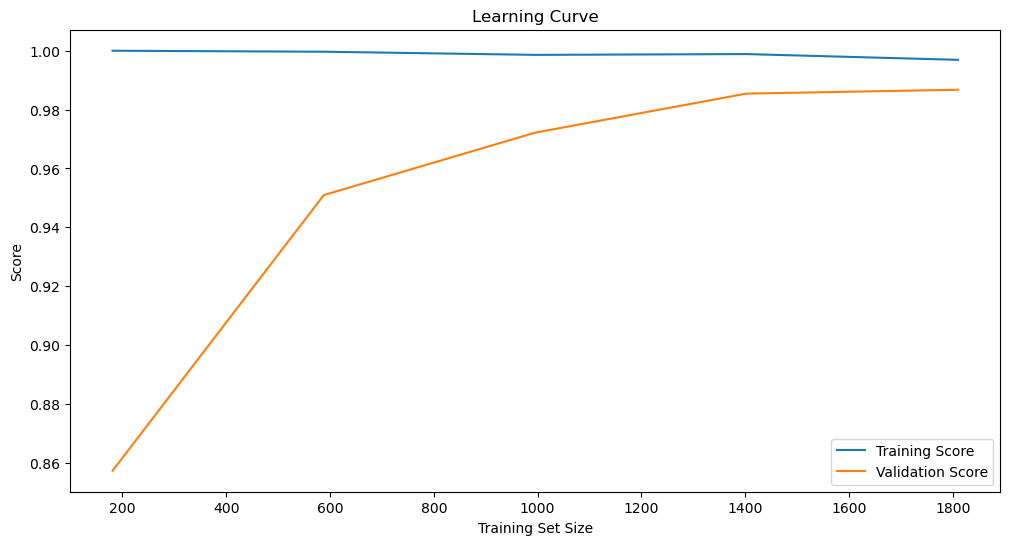

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [1]:
!pip install scikeras[tensorflow] scikit-learn seaborn imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.impute import SimpleImputer
import tensorflow as tf
from keras.callbacks import Callback
file_path = 'Almond.csv'  
almond_data = pd.read_csv(file_path)
# data preprocessing
almond_data['Length (major axis)'].fillna(almond_data['Length (major axis)'].mean(), inplace=True)
almond_data_cleaned = almond_data.drop(columns=['Roundness', 'Aspect Ratio', 'Eccentricity'])
X = almond_data_cleaned.drop(columns=['Type'])
y = almond_data_cleaned['Type']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
class WeightLogger(Callback):
    def __init__(self):
        super(WeightLogger, self).__init__()
        self.weights = []
    def on_epoch_end(self, epoch, logs=None):
        self.weights.append(self.model.get_weights())
# creating my model
def create_model(optimizer='adam', neurons=64, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rprop':
        rprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
        opt = rprop_optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model = KerasClassifier( model=create_model,verbose=0)
param_grid = {
    'model__optimizer': ['adam', 'rprop'],
    'model__neurons': [32, 64, 128],
    'model__learning_rate': [0.001, 0.0001, 0.00001],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'epochs': [100],
    'batch_size': [32]
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, verbose=1)
weight_logger = WeightLogger()
grid_result = grid.fit(X_train, y_train, callbacks=[weight_logger])
print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")
results = pd.DataFrame(grid.cv_results_)
grouped_results = results.groupby(['param_model__neurons', 'param_model__learning_rate']).agg({
    'mean_test_score': 'mean'
}).reset_index()
scores_matrix = grouped_results.pivot(index='param_model__neurons', columns='param_model__learning_rate', values='mean_test_score')

# diagram for heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".4f", cmap='viridis')
plt.title('Hyperparameter Grid Search Results (Accuracy)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Neurons')
plt.show()
history = grid.best_estimator_.history_
# diagram for training and validation accuracy and loss 
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.subplot(2, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.tight_layout()
plt.show()
y_pred = grid.best_estimator_.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# i am printing my classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Mamra', 'Sanora', 'Regular']))
print(f"Test Accuracy: {grid.best_estimator_.score(X_test, y_test)}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-Score: {f1}")
# diagran to show test results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [grid.best_estimator_.score(X_test, y_test), precision, recall, f1]
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylim(0, 1) 
plt.ylabel('Score')
plt.title('Final Test Metrics')
plt.show()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mamra', 'Sanora', 'Regular'])
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
train_sizes, train_scores, val_scores = learning_curve(grid.best_estimator_, X_train, y_train,train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
# diagram for learning curve
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, val_mean, label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()
# diagram for weight updates
def plot_weights(weight_updates):
    weights_array = np.array(weight_updates)
    first_layer_weights = weights_array[:, 0][..., 0]  
    plt.figure(figsize=(12, 6))
    for i in range(first_layer_weights.shape[1]):  # For each neuron in the first layer
        plt.plot(first_layer_weights[:, i], label=f'Neuron {i + 1}')
    plt.title('Weight Updates for the First Layer Neurons')
    plt.xlabel('Epoch')
    plt.ylabel('Weight Value')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_weights(weight_logger.weights)
# diagram for correlation heatmap
correlation_matrix = almond_data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()
